<a href="https://colab.research.google.com/github/akashganesan1/Netflix-Shows-Movies-Genre-Prediction/blob/main/Netflix%20Genre%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Libraries
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#@title Custom Functions
def missing_values_percentage(dataframe):
    result= (round((dataframe.isnull().sum() * 100/ len(dataframe)),2).sort_values(ascending=False))
    df_missing_values = pd.DataFrame(result,columns=['missing_percentage'])
    df_missing_values.reset_index(inplace=True)
    df_missing_values = df_missing_values.rename(columns = {'index':'column_name'})
    return df_missing_values


def deleting_columns(dataframe1,dataframe2):
    column_list = dataframe2['column_name'].to_numpy()
    for i in column_list:
        dataframe1 = dataframe1.drop([i], axis=1)
    return dataframe1

In [3]:
#@title Data Cleaning { display-mode: "form" }
url='https://drive.google.com/file/d/1IHDr6R9SBDV8VvCdFCDOfTCaEi2vAAzW/view?usp=share_link'
url1='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url1)

In [4]:
missing_values_percentage(df)

,column_name,missing_percentage
0,director,29.91
1,country,9.44
2,cast,9.37
3,date_added,0.11
4,rating,0.05
5,duration,0.03
6,show_id,0.00
7,type,0.00
8,title,0.00
9,release_year,0.00


In [5]:
df = df.dropna(subset=['director'])
df = df.reset_index(drop=True)
missing_values_percentage(df)

,column_name,missing_percentage
0,cast,7.66
1,country,6.84
2,duration,0.05
3,rating,0.02
4,show_id,0.00
5,type,0.00
6,title,0.00
7,director,0.00
8,date_added,0.00
9,release_year,0.00


In [6]:
df['cast'] = df['cast'].astype(str).str.split(',')
df_temp = pd.DataFrame(df['cast'].tolist(), columns=['cast_' + str(i) for i in range(1, df['cast'].apply(len).max()+1)])
df = pd.concat([df, df_temp], axis=1)


In [7]:
df['listed_in'] = df['listed_in'].astype(str).str.split(',')
df_temp = pd.DataFrame(df['listed_in'].tolist(), columns=['genre_' + str(i) for i in range(1, df['listed_in'].apply(len).max()+1)])
df = pd.concat([df, df_temp], axis=1)


In [8]:
columns_tobe_deleted = missing_values_percentage(df)
columns_tobe_deleted 

,column_name,missing_percentage
0,cast_44,99.98
1,cast_43,99.98
2,cast_42,99.98
3,cast_41,99.97
4,cast_40,99.97
5,cast_39,99.94
6,cast_38,99.92
7,cast_37,99.92
8,cast_36,99.90
9,cast_35,99.90


In [9]:
df_missing_values = columns_tobe_deleted [columns_tobe_deleted ['missing_percentage'] > 30.0]
df_missing_values

,column_name,missing_percentage
0,cast_44,99.98
1,cast_43,99.98
2,cast_42,99.98
3,cast_41,99.97
4,cast_40,99.97
5,cast_39,99.94
6,cast_38,99.92
7,cast_37,99.92
8,cast_36,99.90
9,cast_35,99.90


In [10]:
column_list = df_missing_values['column_name'].to_numpy()
for i in column_list:
  df = df.drop([i], axis=1)

In [11]:
missing_values_percentage(df)

,column_name,missing_percentage
0,cast_6,27.70
1,cast_5,23.75
2,genre_2,22.89
3,cast_4,21.08
4,cast_3,19.33
5,cast_2,17.69
6,country,6.84
7,duration,0.05
8,rating,0.02
9,cast_1,0.00


In [12]:
df = df.applymap(lambda x: x.upper() if type(x) == str else x)


In [13]:
df = df.dropna()
df = df.reset_index(drop=True)

In [14]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,cast_1,cast_2,cast_3,cast_4,cast_5,cast_6,genre_1,genre_2
0,S8,MOVIE,SANKOFA,HAILE GERIMA,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandr...","UNITED STATES, GHANA, BURKINA FASO, UNITED KIN...","SEPTEMBER 24, 2021",1993,TV-MA,125 MIN,"[Dramas, Independent Movies, International M...","ON A PHOTO SHOOT IN GHANA, AN AMERICAN MODEL S...",KOFI GHANABA,OYAFUNMIKE OGUNLANO,ALEXANDRA DUAH,NICK MEDLEY,MUTABARUKA,AFEMO OMILAMI,DRAMAS,INDEPENDENT MOVIES
1,S10,MOVIE,THE STARLING,THEODORE MELFI,"[Melissa McCarthy, Chris O'Dowd, Kevin Kline...",UNITED STATES,"SEPTEMBER 24, 2021",2021,PG-13,104 MIN,"[Comedies, Dramas]",A WOMAN ADJUSTING TO LIFE AFTER A LOSS CONTEND...,MELISSA MCCARTHY,CHRIS O'DOWD,KEVIN KLINE,TIMOTHY OLYPHANT,DAVEED DIGGS,SKYLER GISONDO,COMEDIES,DRAMAS
2,S13,MOVIE,JE SUIS KARL,CHRISTIAN SCHWOCHOW,"[Luna Wedler, Jannis Niewöhner, Milan Pesche...","GERMANY, CZECH REPUBLIC","SEPTEMBER 23, 2021",2021,TV-MA,127 MIN,"[Dramas, International Movies]",AFTER MOST OF HER FAMILY IS MURDERED IN A TERR...,LUNA WEDLER,JANNIS NIEWÖHNER,MILAN PESCHEL,EDIN HASANOVIĆ,ANNA FIALOVÁ,MARLON BOESS,DRAMAS,INTERNATIONAL MOVIES
3,S29,MOVIE,DARK SKIES,SCOTT STEWART,"[Keri Russell, Josh Hamilton, J.K. Simmons, ...",UNITED STATES,"SEPTEMBER 19, 2021",2013,PG-13,97 MIN,"[Horror Movies, Sci-Fi & Fantasy]",A FAMILY’S IDYLLIC SUBURBAN LIFE SHATTERS WHEN...,KERI RUSSELL,JOSH HAMILTON,J.K. SIMMONS,DAKOTA GOYO,KADAN ROCKETT,L.J. BENET,HORROR MOVIES,SCI-FI & FANTASY
4,S39,MOVIE,BIRTH OF THE DRAGON,GEORGE NOLFI,"[Billy Magnussen, Ron Yuan, Qu Jingjing, Te...","CHINA, CANADA, UNITED STATES","SEPTEMBER 16, 2021",2017,PG-13,96 MIN,"[Action & Adventure, Dramas]",A YOUNG BRUCE LEE ANGERS KUNG FU TRADITIONALIS...,BILLY MAGNUSSEN,RON YUAN,QU JINGJING,TERRY CHEN,VANNESS WU,JIN XING,ACTION & ADVENTURE,DRAMAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,S8802,MOVIE,ZINZANA,MAJID AL ANSARI,"[Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jab...","UNITED ARAB EMIRATES, JORDAN","MARCH 9, 2016",2015,TV-MA,96 MIN,"[Dramas, International Movies, Thrillers]",RECOVERING ALCOHOLIC TALAL WAKES UP INSIDE A S...,ALI SULIMAN,SALEH BAKRI,YASA,ALI AL-JABRI,MANSOOR ALFEELI,AHD,DRAMAS,INTERNATIONAL MOVIES
3580,S8803,MOVIE,ZODIAC,DAVID FINCHER,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downe...",UNITED STATES,"NOVEMBER 20, 2019",2007,R,158 MIN,"[Cult Movies, Dramas, Thrillers]","A POLITICAL CARTOONIST, A CRIME REPORTER AND A...",MARK RUFFALO,JAKE GYLLENHAAL,ROBERT DOWNEY JR.,ANTHONY EDWARDS,BRIAN COX,ELIAS KOTEAS,CULT MOVIES,DRAMAS
3581,S8805,MOVIE,ZOMBIELAND,RUBEN FLEISCHER,"[Jesse Eisenberg, Woody Harrelson, Emma Ston...",UNITED STATES,"NOVEMBER 1, 2019",2009,R,88 MIN,"[Comedies, Horror Movies]",LOOKING TO SURVIVE IN A WORLD TAKEN OVER BY ZO...,JESSE EISENBERG,WOODY HARRELSON,EMMA STONE,ABIGAIL BRESLIN,AMBER HEARD,BILL MURRAY,COMEDIES,HORROR MOVIES
3582,S8806,MOVIE,ZOOM,PETER HEWITT,"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",UNITED STATES,"JANUARY 11, 2020",2006,PG,88 MIN,"[Children & Family Movies, Comedies]","DRAGGED FROM CIVILIAN LIFE, A FORMER SUPERHERO...",TIM ALLEN,COURTENEY COX,CHEVY CHASE,KATE MARA,RYAN NEWMAN,MICHAEL CASSIDY,CHILDREN & FAMILY MOVIES,COMEDIES


In [15]:
missing_values_percentage(df)

,column_name,missing_percentage
0,show_id,0.0
1,type,0.0
2,genre_1,0.0
3,cast_6,0.0
4,cast_5,0.0
5,cast_4,0.0
6,cast_3,0.0
7,cast_2,0.0
8,cast_1,0.0
9,description,0.0


In [16]:
df.drop(['cast','listed_in'], axis=1, inplace=True)


In [17]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,description,cast_1,cast_2,cast_3,cast_4,cast_5,cast_6,genre_1,genre_2
0,S8,MOVIE,SANKOFA,HAILE GERIMA,"UNITED STATES, GHANA, BURKINA FASO, UNITED KIN...","SEPTEMBER 24, 2021",1993,TV-MA,125 MIN,"ON A PHOTO SHOOT IN GHANA, AN AMERICAN MODEL S...",KOFI GHANABA,OYAFUNMIKE OGUNLANO,ALEXANDRA DUAH,NICK MEDLEY,MUTABARUKA,AFEMO OMILAMI,DRAMAS,INDEPENDENT MOVIES
1,S10,MOVIE,THE STARLING,THEODORE MELFI,UNITED STATES,"SEPTEMBER 24, 2021",2021,PG-13,104 MIN,A WOMAN ADJUSTING TO LIFE AFTER A LOSS CONTEND...,MELISSA MCCARTHY,CHRIS O'DOWD,KEVIN KLINE,TIMOTHY OLYPHANT,DAVEED DIGGS,SKYLER GISONDO,COMEDIES,DRAMAS
2,S13,MOVIE,JE SUIS KARL,CHRISTIAN SCHWOCHOW,"GERMANY, CZECH REPUBLIC","SEPTEMBER 23, 2021",2021,TV-MA,127 MIN,AFTER MOST OF HER FAMILY IS MURDERED IN A TERR...,LUNA WEDLER,JANNIS NIEWÖHNER,MILAN PESCHEL,EDIN HASANOVIĆ,ANNA FIALOVÁ,MARLON BOESS,DRAMAS,INTERNATIONAL MOVIES
3,S29,MOVIE,DARK SKIES,SCOTT STEWART,UNITED STATES,"SEPTEMBER 19, 2021",2013,PG-13,97 MIN,A FAMILY’S IDYLLIC SUBURBAN LIFE SHATTERS WHEN...,KERI RUSSELL,JOSH HAMILTON,J.K. SIMMONS,DAKOTA GOYO,KADAN ROCKETT,L.J. BENET,HORROR MOVIES,SCI-FI & FANTASY
4,S39,MOVIE,BIRTH OF THE DRAGON,GEORGE NOLFI,"CHINA, CANADA, UNITED STATES","SEPTEMBER 16, 2021",2017,PG-13,96 MIN,A YOUNG BRUCE LEE ANGERS KUNG FU TRADITIONALIS...,BILLY MAGNUSSEN,RON YUAN,QU JINGJING,TERRY CHEN,VANNESS WU,JIN XING,ACTION & ADVENTURE,DRAMAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3579,S8802,MOVIE,ZINZANA,MAJID AL ANSARI,"UNITED ARAB EMIRATES, JORDAN","MARCH 9, 2016",2015,TV-MA,96 MIN,RECOVERING ALCOHOLIC TALAL WAKES UP INSIDE A S...,ALI SULIMAN,SALEH BAKRI,YASA,ALI AL-JABRI,MANSOOR ALFEELI,AHD,DRAMAS,INTERNATIONAL MOVIES
3580,S8803,MOVIE,ZODIAC,DAVID FINCHER,UNITED STATES,"NOVEMBER 20, 2019",2007,R,158 MIN,"A POLITICAL CARTOONIST, A CRIME REPORTER AND A...",MARK RUFFALO,JAKE GYLLENHAAL,ROBERT DOWNEY JR.,ANTHONY EDWARDS,BRIAN COX,ELIAS KOTEAS,CULT MOVIES,DRAMAS
3581,S8805,MOVIE,ZOMBIELAND,RUBEN FLEISCHER,UNITED STATES,"NOVEMBER 1, 2019",2009,R,88 MIN,LOOKING TO SURVIVE IN A WORLD TAKEN OVER BY ZO...,JESSE EISENBERG,WOODY HARRELSON,EMMA STONE,ABIGAIL BRESLIN,AMBER HEARD,BILL MURRAY,COMEDIES,HORROR MOVIES
3582,S8806,MOVIE,ZOOM,PETER HEWITT,UNITED STATES,"JANUARY 11, 2020",2006,PG,88 MIN,"DRAGGED FROM CIVILIAN LIFE, A FORMER SUPERHERO...",TIM ALLEN,COURTENEY COX,CHEVY CHASE,KATE MARA,RYAN NEWMAN,MICHAEL CASSIDY,CHILDREN & FAMILY MOVIES,COMEDIES


In [18]:
df['genre_1'].nunique()

24

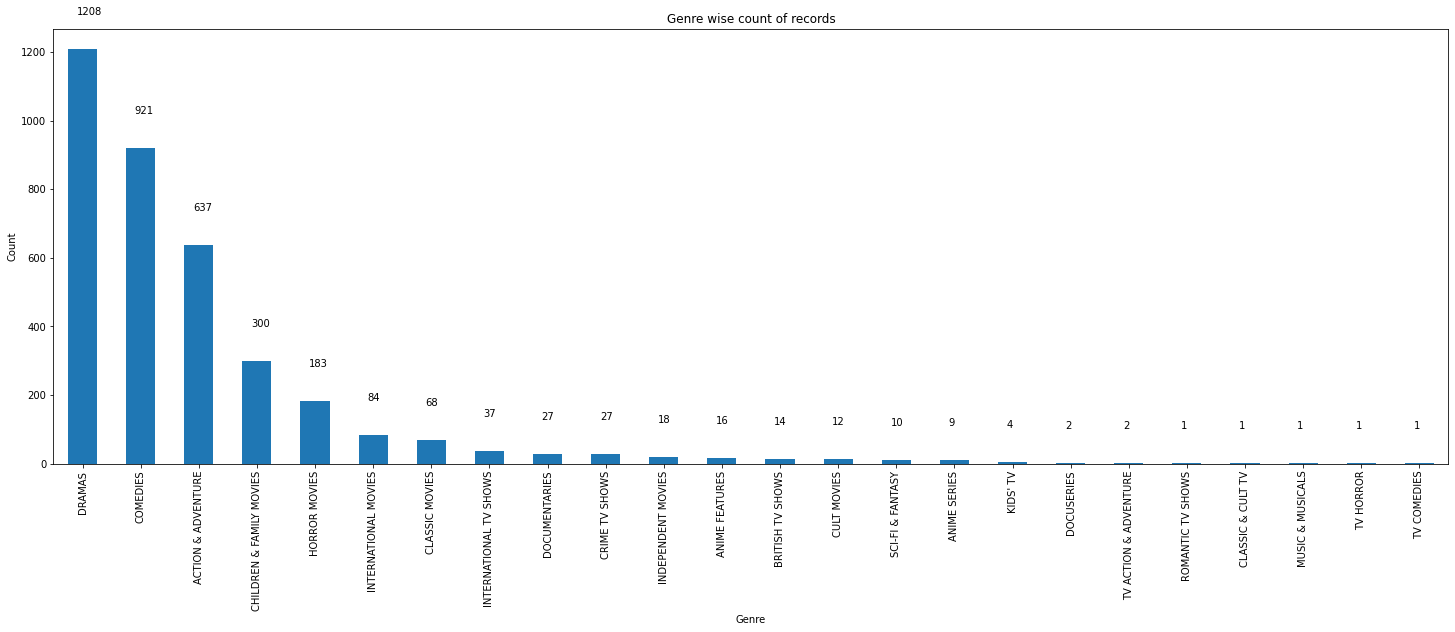

In [19]:
value_counts = df['genre_1'].value_counts()
plt.figure(figsize=(25, 8))
value_counts.plot(kind='bar')
plt.title('Genre wise count of records')
plt.xlabel('Genre')
plt.ylabel('Count')
for i, v in enumerate(value_counts):
    plt.text(i - 0.1, v + 100, str(v))
plt.show()


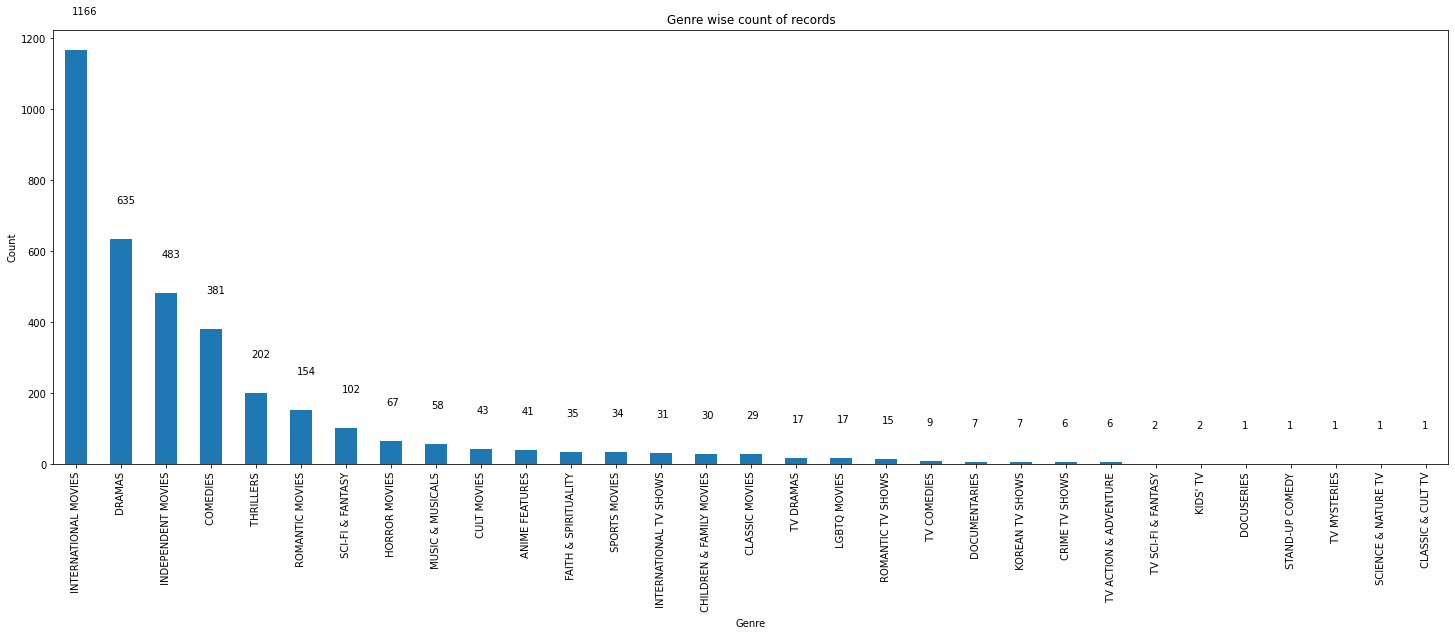

In [20]:
value_counts = df['genre_2'].value_counts()
plt.figure(figsize=(25, 8))
value_counts.plot(kind='bar')
plt.title('Genre wise count of records')
plt.xlabel('Genre')
plt.ylabel('Count')
for i, v in enumerate(value_counts):
    plt.text(i - 0.1, v + 100, str(v))
plt.show()


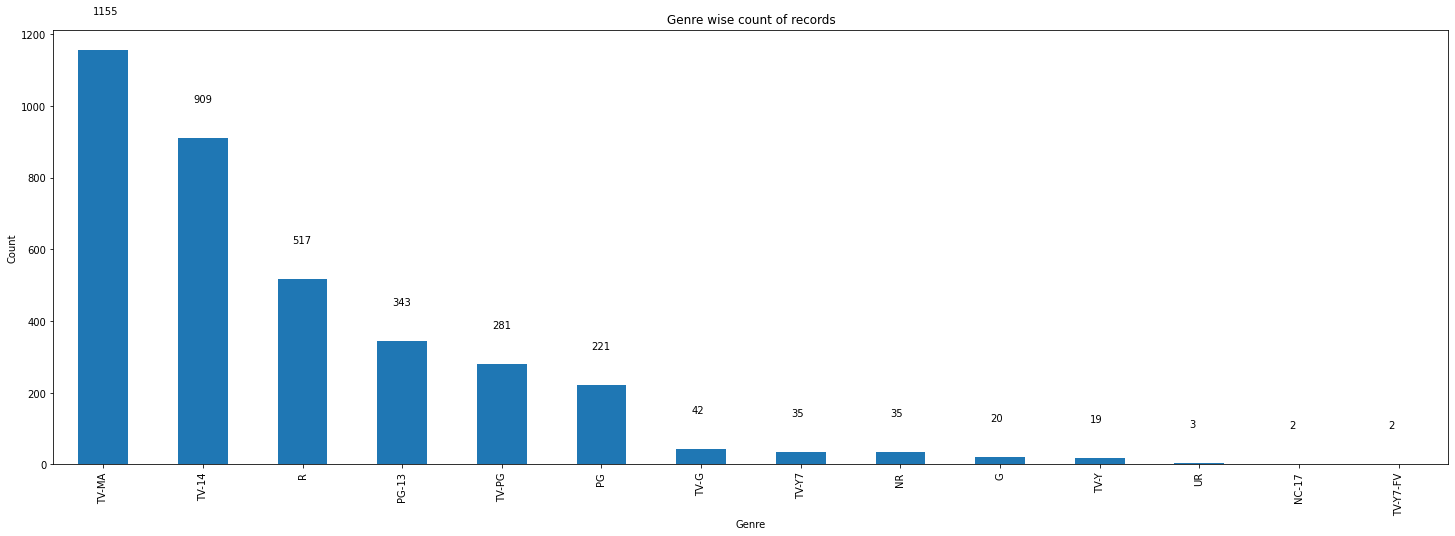

In [21]:
value_counts = df['rating'].value_counts()
plt.figure(figsize=(25, 8))
value_counts.plot(kind='bar')
plt.title('Genre wise count of records')
plt.xlabel('Genre')
plt.ylabel('Count')
for i, v in enumerate(value_counts):
    plt.text(i - 0.1, v + 100, str(v))
plt.show()

In [22]:
# Count the values in the 'column_name' column
counts = df['genre_1'].value_counts()

# Filter the dataframe to remove rows with counts less than 200
df = df[df['genre_1'].isin(counts[counts > 300].index)]


In [23]:
counts = df['genre_2'].value_counts()

# Filter the dataframe to remove rows with counts less than 200
df = df[df['genre_2'].isin(counts[counts > 300].index)]


In [24]:
df = df.reset_index(drop=True)

In [25]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,description,cast_1,cast_2,cast_3,cast_4,cast_5,cast_6,genre_1,genre_2
0,S8,MOVIE,SANKOFA,HAILE GERIMA,"UNITED STATES, GHANA, BURKINA FASO, UNITED KIN...","SEPTEMBER 24, 2021",1993,TV-MA,125 MIN,"ON A PHOTO SHOOT IN GHANA, AN AMERICAN MODEL S...",KOFI GHANABA,OYAFUNMIKE OGUNLANO,ALEXANDRA DUAH,NICK MEDLEY,MUTABARUKA,AFEMO OMILAMI,DRAMAS,INDEPENDENT MOVIES
1,S10,MOVIE,THE STARLING,THEODORE MELFI,UNITED STATES,"SEPTEMBER 24, 2021",2021,PG-13,104 MIN,A WOMAN ADJUSTING TO LIFE AFTER A LOSS CONTEND...,MELISSA MCCARTHY,CHRIS O'DOWD,KEVIN KLINE,TIMOTHY OLYPHANT,DAVEED DIGGS,SKYLER GISONDO,COMEDIES,DRAMAS
2,S13,MOVIE,JE SUIS KARL,CHRISTIAN SCHWOCHOW,"GERMANY, CZECH REPUBLIC","SEPTEMBER 23, 2021",2021,TV-MA,127 MIN,AFTER MOST OF HER FAMILY IS MURDERED IN A TERR...,LUNA WEDLER,JANNIS NIEWÖHNER,MILAN PESCHEL,EDIN HASANOVIĆ,ANNA FIALOVÁ,MARLON BOESS,DRAMAS,INTERNATIONAL MOVIES
3,S39,MOVIE,BIRTH OF THE DRAGON,GEORGE NOLFI,"CHINA, CANADA, UNITED STATES","SEPTEMBER 16, 2021",2017,PG-13,96 MIN,A YOUNG BRUCE LEE ANGERS KUNG FU TRADITIONALIS...,BILLY MAGNUSSEN,RON YUAN,QU JINGJING,TERRY CHEN,VANNESS WU,JIN XING,ACTION & ADVENTURE,DRAMAS
4,S74,MOVIE,KING OF BOYS,KEMI ADETIBA,NIGERIA,"SEPTEMBER 14, 2021",2018,TV-MA,182 MIN,WHEN A POWERFUL BUSINESSWOMAN’S POLITICAL AMBI...,SOLA SOBOWALE,ADESUA ETOMI,"REMILEKUN ""REMINISCE"" SAFARU","TOBECHUKWU ""ILLBLISS"" EJIOFOR",TONI TONES,PAUL SAMBO,DRAMAS,INTERNATIONAL MOVIES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2033,S8795,MOVIE,اشتباك,MOHAMED DIAB,"EGYPT, FRANCE","OCTOBER 11, 2018",2016,TV-14,98 MIN,AMID THE TUMULT FOLLOWING EGYPTIAN PRESIDENT M...,NELLY KARIM,HANY ADEL,TAREK ABDEL AZIZ,AHMED MALEK,AHMED DASH,HUSNI SHETA,DRAMAS,INDEPENDENT MOVIES
2034,S8799,MOVIE,ZED PLUS,CHANDRA PRAKASH DWIVEDI,INDIA,"DECEMBER 31, 2019",2014,TV-MA,131 MIN,A PHILANDERING SMALL-TOWN MECHANIC'S POLITICAL...,ADIL HUSSAIN,MONA SINGH,K.K. RAINA,SANJAY MISHRA,ANIL RASTOGI,RAVI JHANKAL,COMEDIES,DRAMAS
2035,S8800,MOVIE,ZENDA,AVADHOOT GUPTE,INDIA,"FEBRUARY 15, 2018",2009,TV-14,120 MIN,A CHANGE IN THE LEADERSHIP OF A POLITICAL PART...,SANTOSH JUVEKAR,SIDDHARTH CHANDEKAR,SACHIT PATIL,CHINMAY MANDLEKAR,RAJESH SHRINGARPURE,PUSHKAR SHROTRI,DRAMAS,INTERNATIONAL MOVIES
2036,S8802,MOVIE,ZINZANA,MAJID AL ANSARI,"UNITED ARAB EMIRATES, JORDAN","MARCH 9, 2016",2015,TV-MA,96 MIN,RECOVERING ALCOHOLIC TALAL WAKES UP INSIDE A S...,ALI SULIMAN,SALEH BAKRI,YASA,ALI AL-JABRI,MANSOOR ALFEELI,AHD,DRAMAS,INTERNATIONAL MOVIES


In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# Load the dataset
#df = pd.read_csv('dataset.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['description'], df['genre_1'], test_size=0.2)

# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a LinearSVC classifier on the training set
classifier = LinearSVC()
classifier.fit(X_train_tfidf, y_train)

# Test the classifier on the testing set
accuracy = classifier.score(X_test_tfidf, y_test)
print('Accuracy:', accuracy)

# Use the classifier to predict the genre of new descriptions
new_descriptions = ['there was the a vampire in town', 'A romantic love story about two coworkers who fall in love']
new_descriptions_tfidf = tfidf.transform(new_descriptions)
predictions = classifier.predict(new_descriptions_tfidf)
print('Predictions:', predictions)


Accuracy: 0.6299019607843137
Predictions: ['DRAMAS' 'COMEDIES']


In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [28]:
df = df[['type','director','country','rating','cast_1', 'cast_2','cast_3','cast_4', 'cast_5','cast_6','genre_2','genre_1']]

In [29]:
columns = ['type','director','country','rating','cast_1', 'cast_2','cast_3','cast_4', 'cast_5','cast_6','genre_2','genre_1']
for col in columns:
    df[col] = le.fit_transform(df[col])

<ipython-input-29-d4dec3f262c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


In [30]:
df

,type,director,country,rating,cast_1,cast_2,cast_3,cast_4,cast_5,cast_6,genre_2,genre_1
0,0,544,297,7,769,1209,76,1189,1169,23,1,2
1,0,1493,285,3,937,318,861,1690,415,1622,0,1
2,0,298,95,7,848,683,1087,494,145,1046,2,2
3,0,510,46,3,202,1353,1268,1679,1760,750,0,0
4,0,765,174,7,1313,22,1342,1699,1719,1290,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2033,0,982,66,5,1016,588,1628,33,38,642,1,2
2034,0,273,110,7,19,1090,805,1462,130,1392,0,1
2035,0,181,110,5,1246,1481,1409,340,1357,1348,2,2
2036,0,876,246,7,73,1381,1770,74,1043,26,2,2


RandomForestClassifier

In [31]:
X = df[['type','director','country','rating','cast_1', 'cast_2','cast_3','cast_4', 'cast_5','cast_6','genre_2']]

In [32]:
Y = df['genre_1']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

In [34]:
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.6348039215686274


In [35]:
# create a new dataset with your own input values
'''new_data = pd.DataFrame({
    'type': ['Movie'],            # example input: 'Movie' or 'TV Show'
    'director': ['John Doe'],     # example input: a director's name
    'country': ['United States'], # example input: a country name
    'rating': ['PG'],             # example input: a rating category
    'cast_1': ['Tom Hanks'],      # example input: an actor's name
    'cast_2': ['Emma Watson'],    # example input: another actor's name
    'cast_3': ['Meryl Streep'],   # example input: another actor's name
    'cast_4': [''],               # example input: an empty string
    'cast_5': [''],               # example input: an empty string
    'cast_6': [''],               # example input: an empty string
    'genre_2': ['Comedy']         # example input: a secondary genre
})

# make predictions on the new dataset using the trained classifier
y_pred_new = clf.predict(new_data)

# print the predicted genre(s) for the new dataset
print(y_pred_new)
'''


"new_data = pd.DataFrame({\n    'type': ['Movie'],            # example input: 'Movie' or 'TV Show'\n    'director': ['John Doe'],     # example input: a director's name\n    'country': ['United States'], # example input: a country name\n    'rating': ['PG'],             # example input: a rating category\n    'cast_1': ['Tom Hanks'],      # example input: an actor's name\n    'cast_2': ['Emma Watson'],    # example input: another actor's name\n    'cast_3': ['Meryl Streep'],   # example input: another actor's name\n    'cast_4': [''],               # example input: an empty string\n    'cast_5': [''],               # example input: an empty string\n    'cast_6': [''],               # example input: an empty string\n    'genre_2': ['Comedy']         # example input: a secondary genre\n})\n\n# make predictions on the new dataset using the trained classifier\ny_pred_new = clf.predict(new_data)\n\n# print the predicted genre(s) for the new dataset\nprint(y_pred_new)\n"

DecisionTreeClassifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree

In [37]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5465686274509803


LogisticRegression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [40]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.5955882352941176


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Age category wise module

In [41]:
df['rating'].unique()

array([ 7,  3,  5,  8,  2,  4,  6,  0,  1, 10,  9])

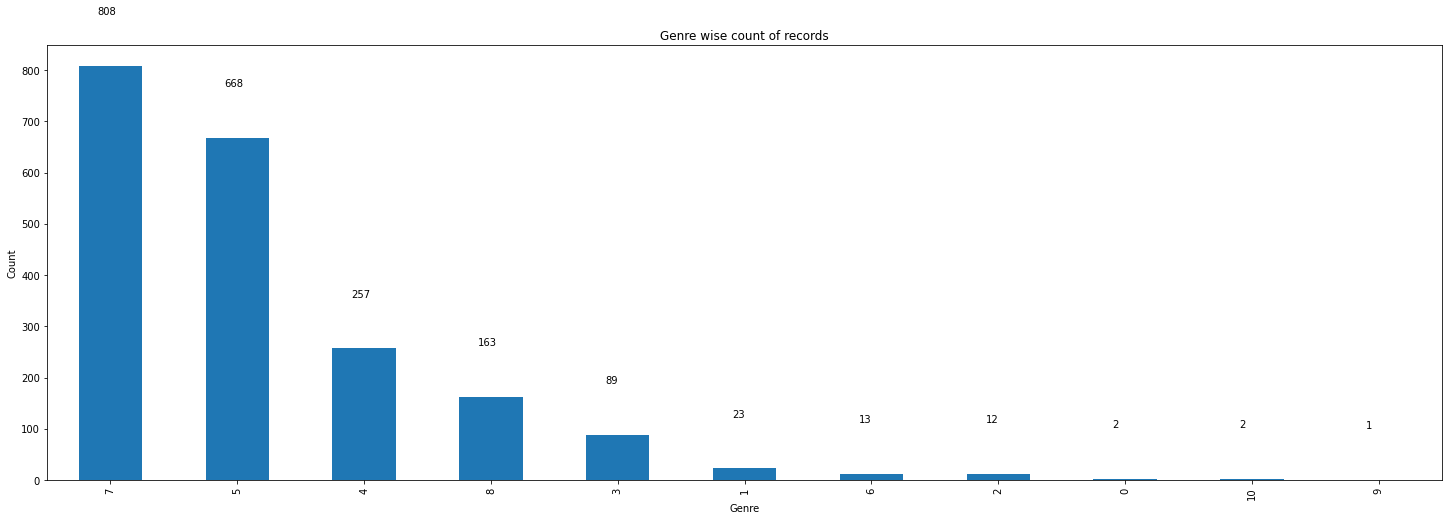

In [42]:
value_counts = df['rating'].value_counts()
plt.figure(figsize=(25, 8))
value_counts.plot(kind='bar')
plt.title('Genre wise count of records')
plt.xlabel('Genre')
plt.ylabel('Count')
for i, v in enumerate(value_counts):
    plt.text(i - 0.1, v + 100, str(v))
plt.show()


In [43]:
value_counts = df['rating'].value_counts(normalize=True) * 100

In [44]:
value_counts

7     39.646712
5     32.777233
4     12.610402
8      7.998037
3      4.367026
1      1.128557
6      0.637880
2      0.588813
0      0.098135
10     0.098135
9      0.049068
Name: rating, dtype: float64